In [1]:
from math import factorial

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import binomial
from scipy.stats import binom, norm

### Secuencias de eventos tipo Bernoulli

*Disbribución Binomial*

$$
P(k,n;p)=\binom{n}{k}p^k(1-p)^{n-k}=\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
$$

In [2]:
def my_binomial(k, n, p):
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p,n-k)
my_binomial(2, 3, .5)

0.375

In [3]:
dist = binom(3, .5)
dist.pmf(2)

0.3750000000000001

### Validación del ejercicio hecho a mano

$$
P(k\leq2;n=3,p=1/2)=\sum_{k=0}^2\left[\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}\right]=\frac{7}{8}
$$

In [4]:
dist.cdf(2)

0.875

### Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

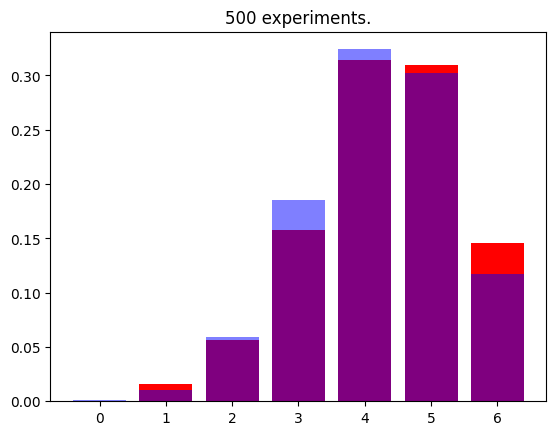

In [5]:
def plot_binomial_experiment(
    success_probability: float, 
    n_successes: int, 
    num_trials: int
):
    values = np.arange(n_successes+1)
    arr = []
    for _ in range(num_trials):
        arr.append(binomial(n_successes, success_probability))
    hist, _ = np.histogram(arr, bins=np.arange(n_successes+2), density=True)
    exacta = [binom(n_successes, success_probability).pmf(k) for k in values]
    plt.bar(values, hist, color='red')
    plt.bar(values, exacta, alpha=0.5, color='blue')
    plt.title(f'{num_trials} experiments.')
    plt.show()
    
plot_binomial_experiment(
    success_probability = 0.7,
    n_successes = 6, 
    num_trials = 500
)

### Distribución Normal

*Teórica*

$$
P(X=x;\mu,\sigma)=\frac{1}{\sqrt{2\pi}\sigma}\exp{\left[-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2\right]}
$$

* $\mu$: media de la distribución
* $\sigma$: desviación estandar de la distribución

In [6]:
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma, 2))

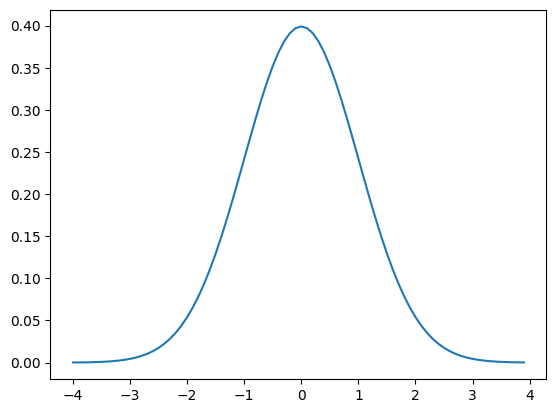

In [7]:
x = np.arange(-4, 4, 0.1)
y = gaussian(x, 0.0, 1.0)

plt.plot(x, y)
plt.show()

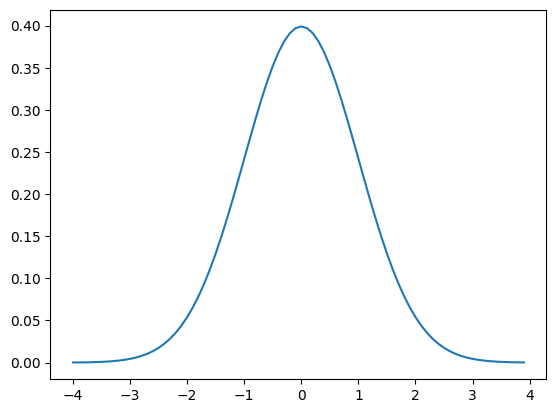

In [8]:
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = dist.pdf(x)
plt.plot(x, y)
plt.show()

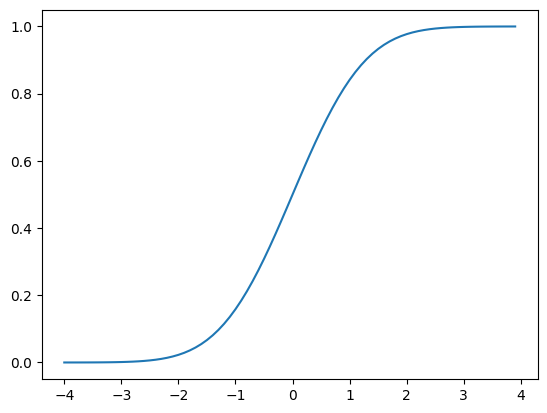

In [9]:
dist = norm(0, 1)
x = np.arange(-4, 4, 0.1)
y = dist.cdf(x)
plt.plot(x, y)
plt.show()

### Distribución Normal (Gausiana) a partir de datos

* Fuente: https://seattlecentral.edu/qelp/sets/057/057.html

<BarContainer object of 19 artists>

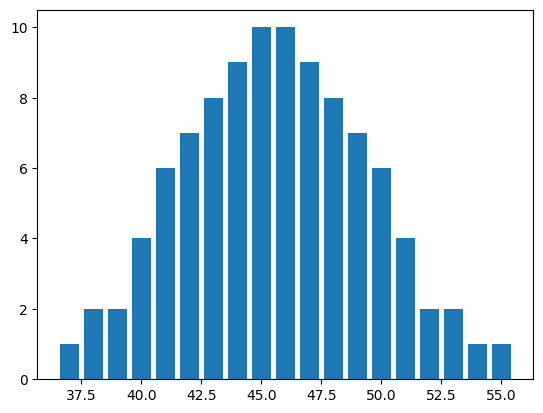

In [10]:
df = pd.read_excel("s057.xls")
arr = df['Normally Distributed Housefly Wing Lengths'].values[4:]
values, dist = np.unique(arr,return_counts=True)
plt.bar(values, dist)

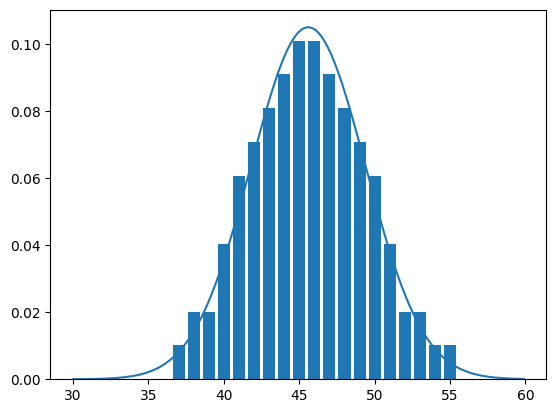

In [11]:
# Estimación de una distribución.

mu = arr.mean()
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30, 60, 0.1)
y = dist.pdf(x)
plt.plot(x, y)

values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr))
plt.show()

In [19]:
from scipy.stats import norm
from numpy.random import normal

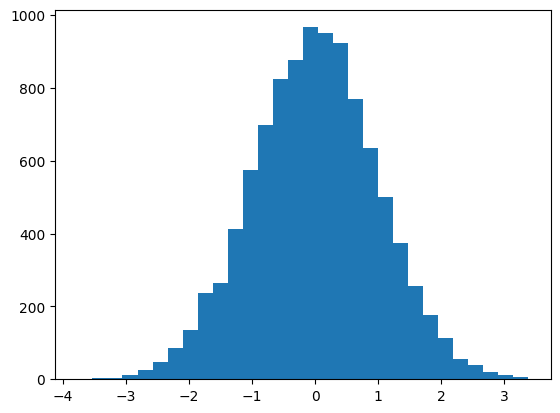

In [23]:
sample = normal(size=10000) # generador
plt.hist(sample, bins=30)
plt.show()

### Estimación paramétrica

mu =  49.75766117533413
sigma =  4.78441415908775


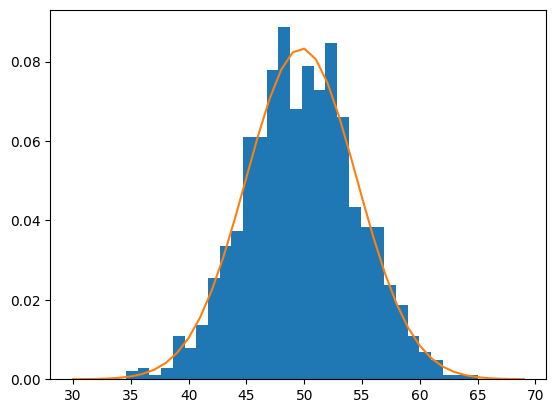

In [39]:
sample = normal(loc=50, scale=5, size=1000) # mu = 50, sigma = 5
plt.hist(sample, bins=30, density=True)

mu = sample.mean()
sigma = sample.std()

values = [value for value in range(30, 70)]
dist = norm(mu, sigma)
probabilities = [dist.pdf(value) for value in values]
plt.plot(values, probabilities)

print("mu = ", mu)
print("sigma = ", sigma)
plt.show()

### Estimación no paramétrica

Kernel Density estimation

* [parámetro de suavizado]: smoothing parameter
* [función base]: basis function

https://scikit-learn.org/stable/modules/density.html

In [89]:
from sklearn.neighbors import KernelDensity

# construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.append(sample1, sample2)

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

KernelDensity(bandwidth=2)

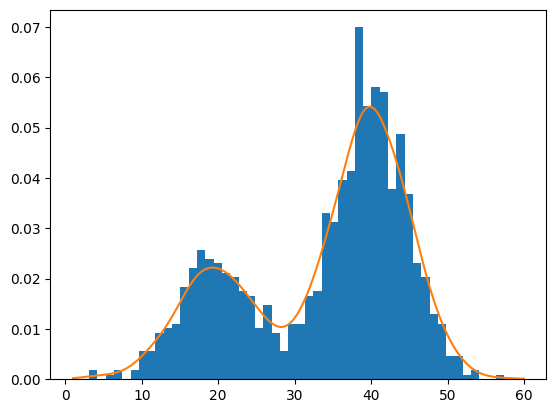

In [90]:
values = np.linspace(1, 60, 1000)
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

plt.hist(sample, bins=50, density=True)
plt.plot(values, probabilities)
plt.show()